In [1]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# diabetes 변수에 데이터를 저장하고, 데이터의 feature는 df_X에, label은 df_y에 저장
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

In [3]:
# 각각을 NumPy 배열로 변환 및 배열 형태 확인
X = np.array(df_X)
y = np.array(df_y)
X.shape, y.shape

((442, 10), (442,))

In [4]:
# scikit-learn의 train_test_split() 메서드를 이용하여 데이터셋을 학습 데이터와 테스트 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# 초기 가중치 및 편향의 값을 랜덤하게 지정.
W = np.random.randn(10)
b = np.random.randn()

# 모델 함수 정의. (NumPy의 dot()을 이용하여 feature 행렬과 가중치 행렬을 곱한 후 편향을 더함)
def model(X):
    pred = np.dot(X, W) + b
    return pred

In [6]:
# 손실함수 정의. metric이 평균제곱오차(MSE)이므로, 실제 데이터 값과 모델의 예측값의 차이의 제곱의 평균을 계산.
def mse_loss(y, pred):
    loss = np.mean((y - pred) ** 2)
    return loss

In [7]:
# 기울기 함수 정의.
def gradient(X, y, pred):
    # feature 행렬의 전치 행렬과 예측값-실제값을 곱한 후 스케일링하여 기울기를 업데이트한다.
    dW = (2 / len(X)) * np.dot(X.T, (pred - y))
    # 예측값-실제값의 총합을 스케일링하여 편향을 업데이트한다.
    db = (2 / len(X)) * np.sum(pred - y)
    return dW, db

In [8]:
# 학습률 지정
LEARNING_RATE = 0.5

In [9]:
# 총 5000번의 시행으로 훈련 데이터로 모델을 학습 및 손실함수를 계산한 후 기울기 함수에 반영한다.
# 기울기 함수에서 업데이트한 값으로 가중치와 편향을 조정한 뒤 다시 학습을 반복한다.
for i in range(1, 5001):
    pred = model(X_train)
    loss = mse_loss(y_train, pred)
    dW, db = gradient(X_train, y_train, pred)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    # 100n번째 수행마다 손실함수 값을 출력
    if i % 100 == 0:
        print(f"Epoch: {i}/5000, Loss: {loss}")

Epoch: 100/5000, Loss: 4048.908770996887
Epoch: 200/5000, Loss: 3487.566665105583
Epoch: 300/5000, Loss: 3257.6483754278793
Epoch: 400/5000, Loss: 3136.001152899024
Epoch: 500/5000, Loss: 3064.1010030450643
Epoch: 600/5000, Loss: 3019.6569120019267
Epoch: 700/5000, Loss: 2991.5253995388302
Epoch: 800/5000, Loss: 2973.3981770140454
Epoch: 900/5000, Loss: 2961.523792307536
Epoch: 1000/5000, Loss: 2953.6180835569658
Epoch: 1100/5000, Loss: 2948.2678032213303
Epoch: 1200/5000, Loss: 2944.5862405701364
Epoch: 1300/5000, Loss: 2942.00951128007
Epoch: 1400/5000, Loss: 2940.1742199770165
Epoch: 1500/5000, Loss: 2938.8430601999808
Epoch: 1600/5000, Loss: 2937.859024822723
Epoch: 1700/5000, Loss: 2937.1168906913467
Epoch: 1800/5000, Loss: 2936.5452502181006
Epoch: 1900/5000, Loss: 2936.095054331879
Epoch: 2000/5000, Loss: 2935.732220124848
Epoch: 2100/5000, Loss: 2935.432804204823
Epoch: 2200/5000, Loss: 2935.179813712883
Epoch: 2300/5000, Loss: 2934.9610744124257
Epoch: 2400/5000, Loss: 2934.76

In [10]:
# 테스트 데이터로 모델을 테스트. 손실함수 값이 3000 이하임을 확인
test_pred = model(X_test)
test_loss = mse_loss(y_test, test_pred)
print(f"Test loss ; {test_loss}")

Test loss ; 2844.4076002388347


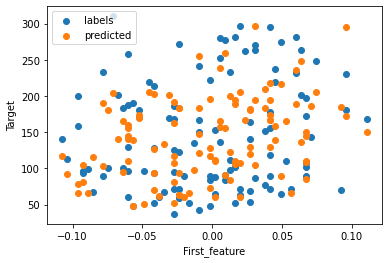

In [11]:
# matplotlib을 이용하여 실제 데이터와 모델의 예측값를 산점도로 표현
plt.scatter(X_test[:,0], y_test, label='labels')
plt.scatter(X_test[:,0], test_pred, label='predicted')
plt.xlabel('First_feature')
plt.ylabel('Target')
plt.legend()
plt.show()